In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df = df.set_index('target')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
0,53,1,0,140,203,1,0,155,1,3.1,0,0,3
0,70,1,0,145,174,0,1,125,1,2.6,0,0,3
0,61,1,0,148,203,0,1,161,0,0.0,2,1,3
0,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.iloc[:,:3]
Y=df.index

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.80,random_state=135)
y_train.shape

(820,)

In [ ]:
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [ ]:
cluster =  []
for k in range (1,11):
  kmean = KMeans(n_clusters=k).fit(df)
  cluster.append(kmean.inertia_)

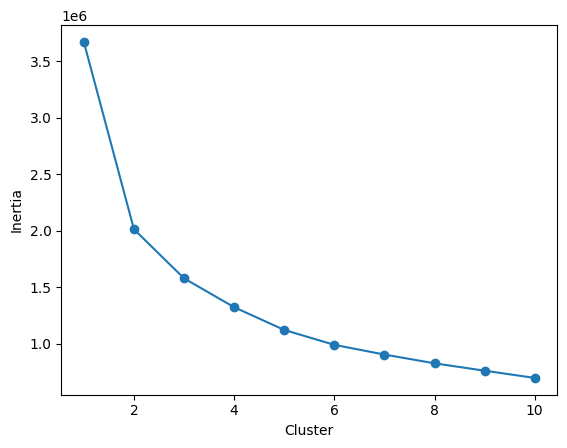

In [ ]:
plt.plot(range(1,11),cluster,marker='o')
plt.xlabel('Cluster')
plt.ylabel('Inertia')
plt.show()

In [ ]:
km = KMeans(n_clusters=5).fit(df)
df['Labels'] = km.labels_
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Labels
target,,,,,,,,,,,,,,
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,3
0,53,1,0,140,203,1,0,155,1,3.1,0,0,3,1
0,70,1,0,145,174,0,1,125,1,2.6,0,0,3,1
0,61,1,0,148,203,0,1,161,0,0.0,2,1,3,1
0,62,0,0,138,294,1,1,106,0,1.9,1,3,2,2


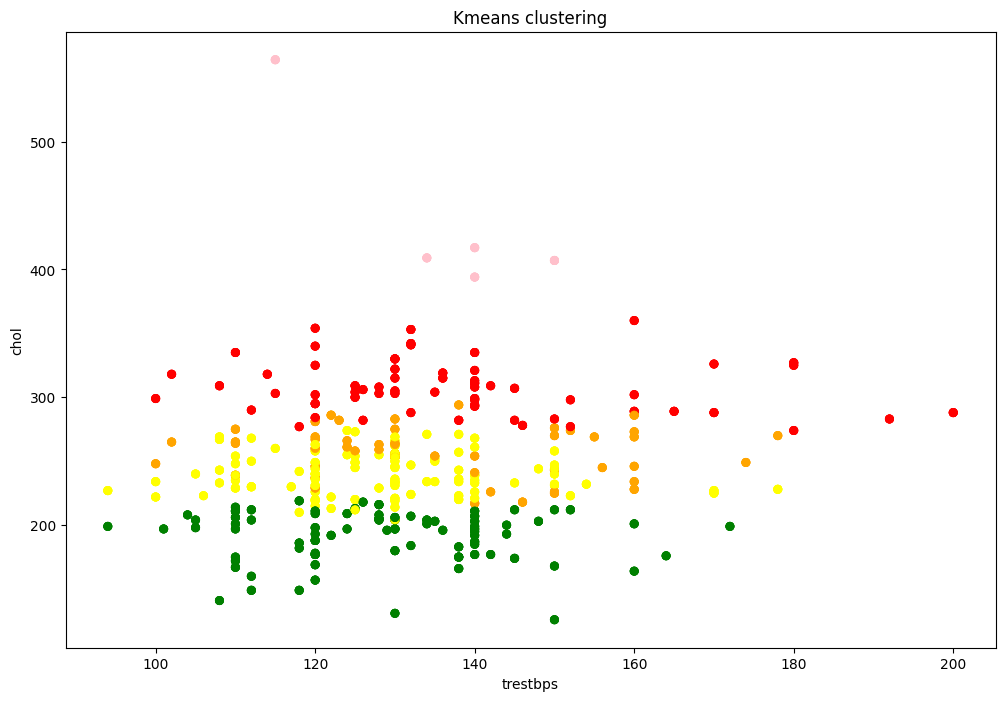

In [ ]:
centers = np.array(km.cluster_centers_)
colors = {0: 'red', 1: 'green', 2: 'orange', 3: 'yellow', 4: 'pink'}

plt.figure(figsize=(12, 8))
plt.scatter(df['trestbps'], df['chol'], linewidths=0.5, color=df['Labels'].map(colors))
plt.title('Kmeans clustering')
plt.xlabel('trestbps')
plt.ylabel('chol')
plt.show()

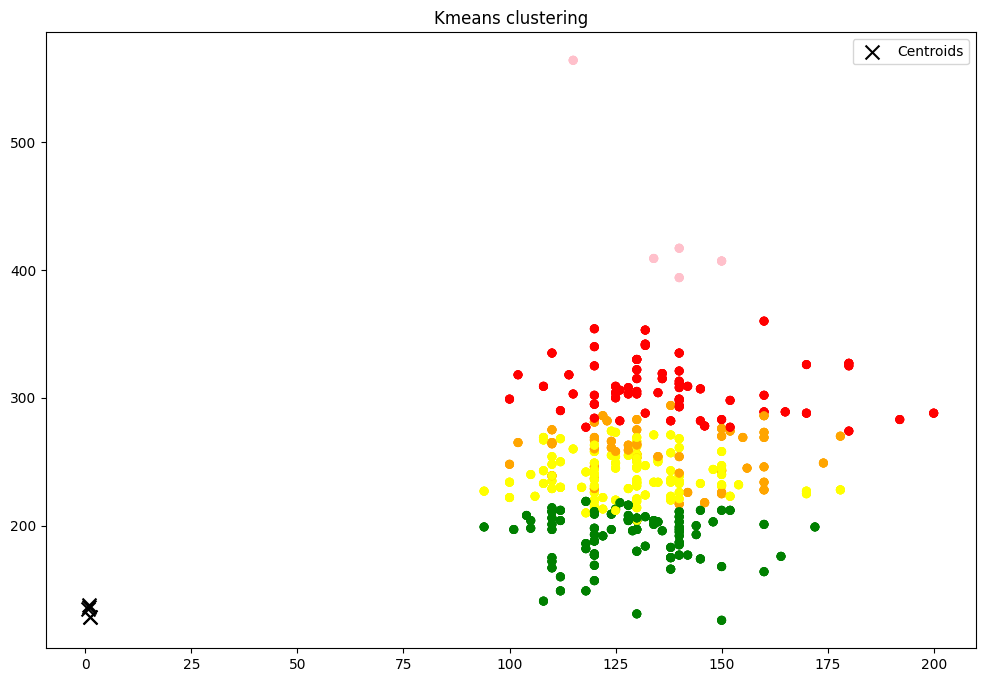

In [ ]:
#centroids
colors = {0: 'red', 1: 'green', 2: 'orange', 3: 'yellow', 4: 'pink'}

plt.figure(figsize=(12, 8))
plt.scatter(df['trestbps'], df['chol'], linewidths=0.5, color=df['Labels'].map(colors))
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:, 3], s=100, c='black', label='Centroids', marker='x')
plt.title("Kmeans clustering")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/archive (2).zip')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<ipython-input-7-7cc7c2b77717>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['age'],kde=True)
<ipython-input-7-7cc7c2b77717>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['trestbps'],kde=True)
<ipython-input-7-7cc7c2b77717>:12: UserWarning: 

`distplot` is a deprecated function a

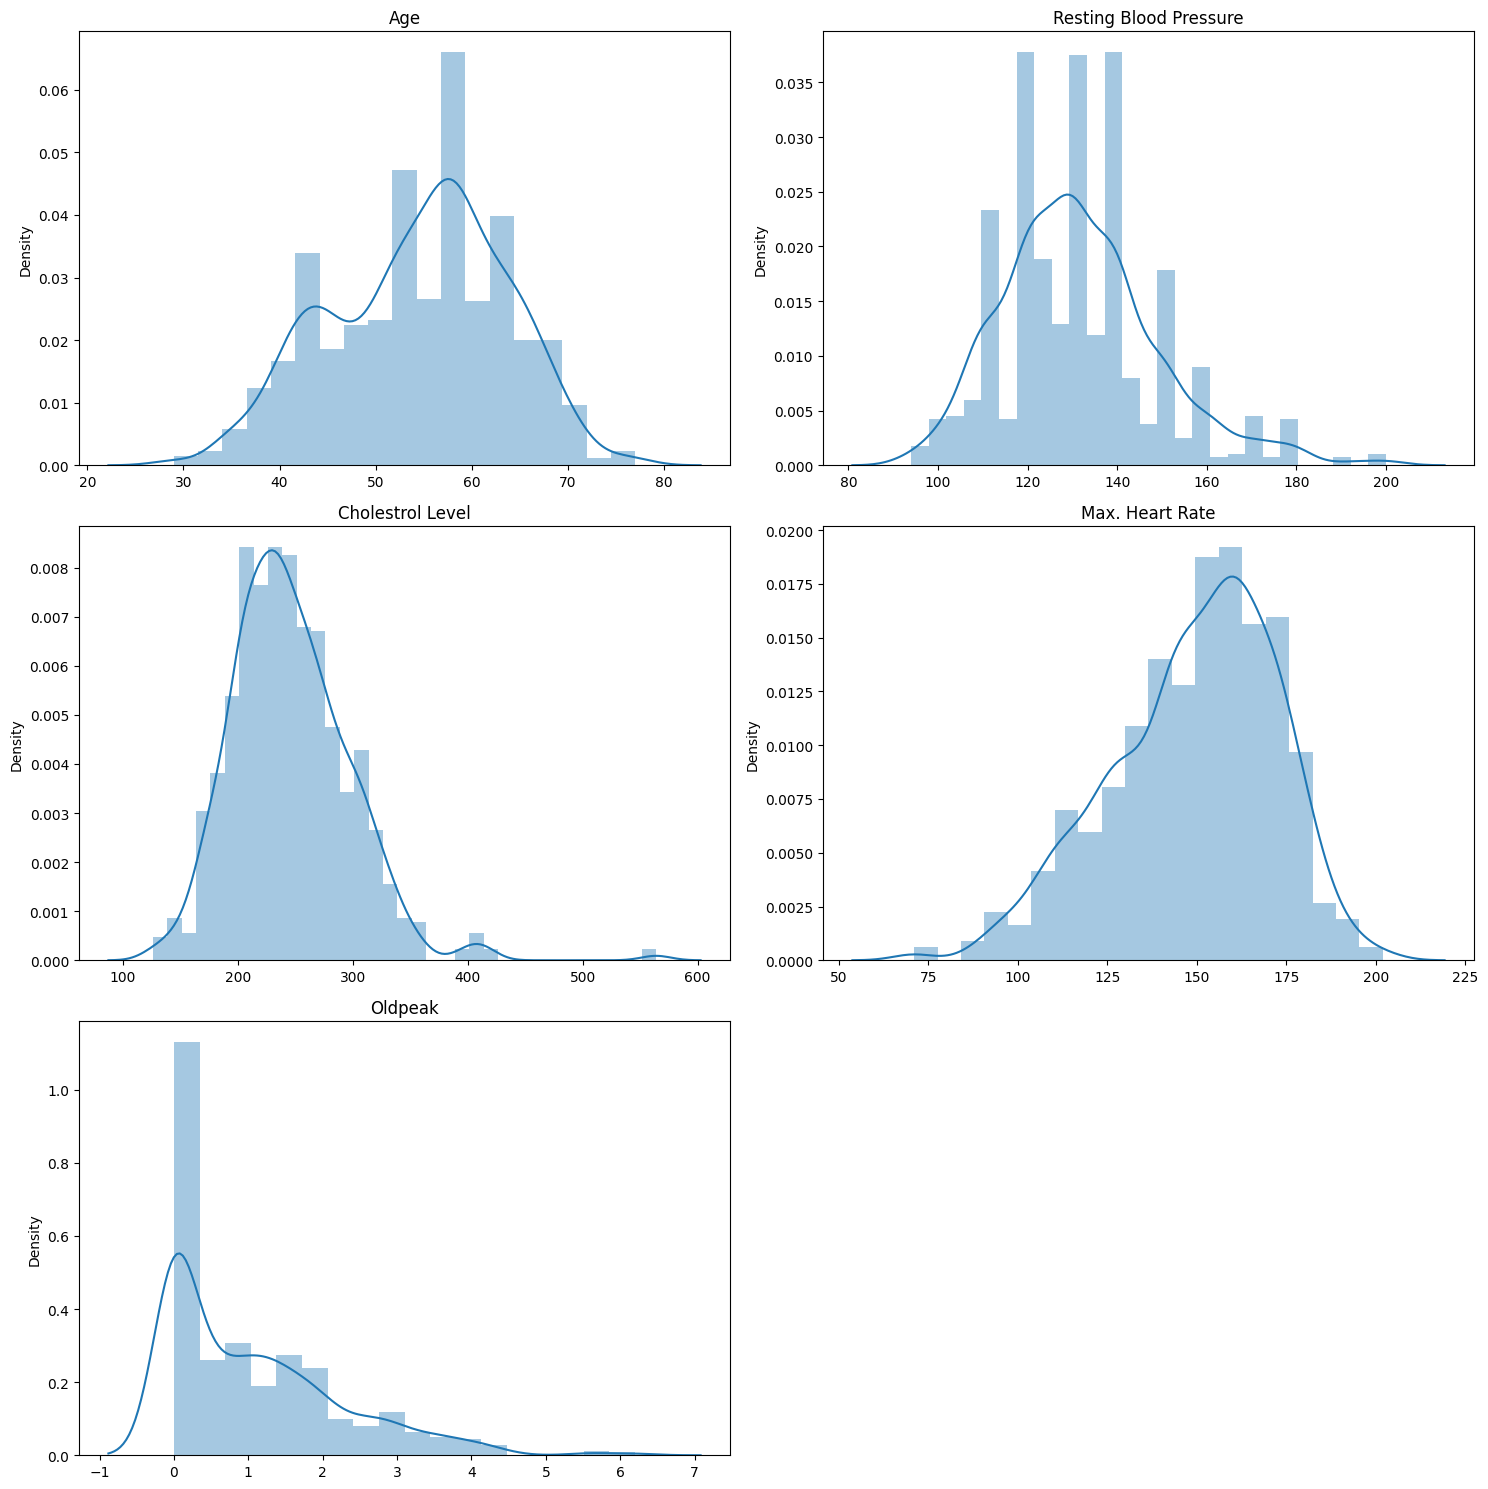

In [ ]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.distplot(x=df['age'],kde=True)
plt.title('Age')

plt.subplot(3,2,2)
sns.distplot(x=df['trestbps'],kde=True)
plt.title('Resting Blood Pressure')

plt.subplot(3,2,3)
sns.distplot(x=df['chol'],kde=True)
plt.title('Cholestrol Level')

plt.subplot(3,2,4)
sns.distplot(x=df['thalach'],kde=True)
plt.title('Max. Heart Rate')

plt.subplot(3,2,5)
sns.distplot(x=df['oldpeak'],kde=True)
plt.title('Oldpeak')

plt.tight_layout()

In [ ]:
# Putting feature variable to X
X = df.drop('target',axis=1)
# Putting response variable to y
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=42)
X_train.shape, X_test.shape

((717, 13), (308, 13))

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from IPython.display import Image
from six import StringIO

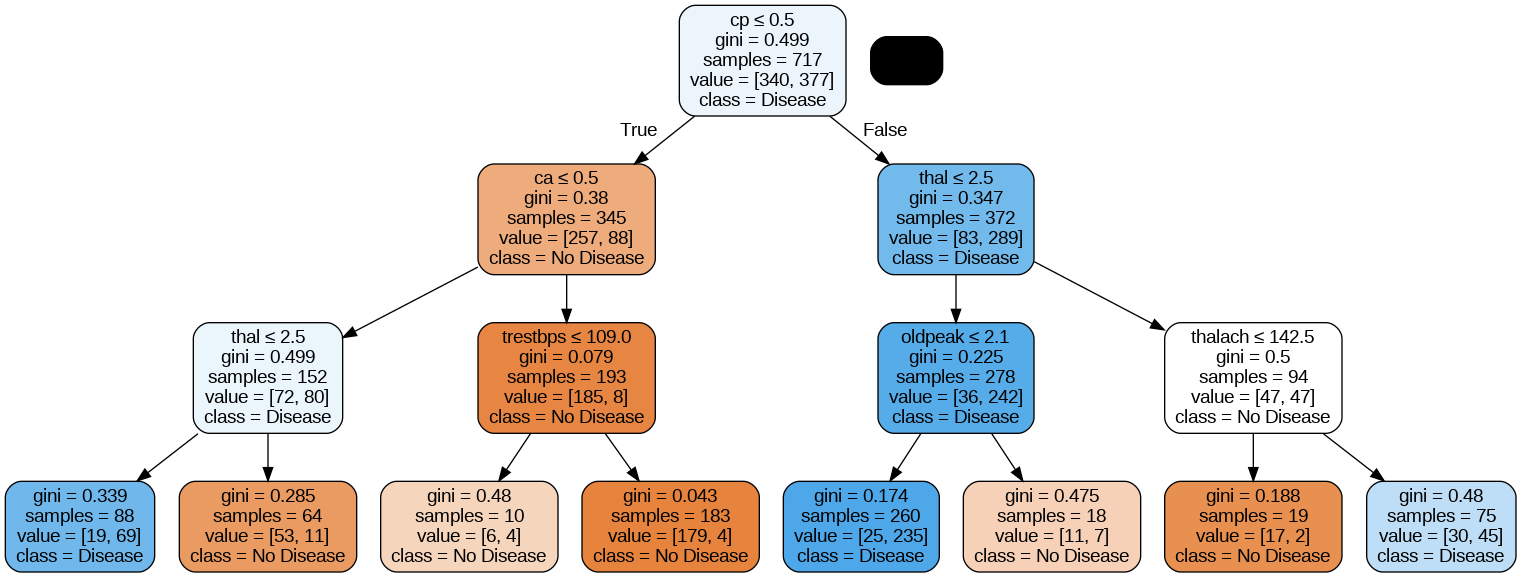

In [ ]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,

feature_names=X.columns, class_names=['No Disease', 'Disease'],
special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
y_train = dt.predict(X_train)
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.73      0.79       159
           1       0.75      0.89      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.82      0.81      0.80       308



In [ ]:
print(accuracy_score(y_test, y_pred))

0.8051948051948052


In [ ]:
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

NameError: name 'y_test' is not defined